In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Data Loading

In [2]:
# loading train.csv
df = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
#loading test.csv
test_df= pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

In [3]:
df.head() #first five values in 'train.csv'

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


In [4]:
test_df.head() #first five values in 'test.csv'

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS
0,c2c61173092ad20db5585ca8c10de6e0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1276.0,0,7.0,0,53447.0,1.0,...,48751.0,0,0.0,0,0,0.0,1.0,11.0,2018-08-12 13:12:00,2018-07-10
1,2e6bb5362ba1ce897feeb1de5edea686,win8defender,1.1.15100.1,4.10.209.0,1.273.371.0,0,7.0,0,46184.0,2.0,...,64709.0,1,0.0,0,0,0.0,0.0,12.0,2018-07-26 06:54:00,2016-10-11
2,692649baed1c50bb8d051ae7f06e3625,win8defender,1.1.15200.1,4.18.1807.18075,1.275.263.0,0,7.0,0,51954.0,2.0,...,33094.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-27 17:29:00,2018-05-08
3,2ff95e7d97e9f80ec81c97622dd93ed6,win8defender,1.1.15300.6,4.18.1807.18075,1.277.58.0,0,7.0,0,41571.0,2.0,...,26184.0,1,0.0,0,0,0.0,0.0,10.0,2018-09-25 22:13:00,2018-05-08
4,256766b4c5011e146f05b323863e08a4,win8defender,1.1.14800.3,4.14.17639.18041,1.267.898.0,0,7.0,0,40645.0,3.0,...,12126.0,0,0.0,0,0,0.0,0.0,7.0,2018-05-06 01:31:00,2018-06-12


In [5]:
#total number of null values in each column
df.isnull().sum()

MachineID             0
ProductName           0
EngineVersion         0
AppVersion            0
SignatureVersion      0
                   ... 
IsGamer             559
RegionIdentifier    559
DateAS                0
DateOS               24
target                0
Length: 76, dtype: int64

In [6]:
#total number of null values in entire data set
df.isnull().sum().sum()

6533

# Exploratory Data Analysis

In [7]:
#data shape - (rows,columns)
df.shape

(100000, 76)

In [8]:
#data types - identifying feature is numerical, categorical and other types of variable
df.dtypes

MachineID            object
ProductName          object
EngineVersion        object
AppVersion           object
SignatureVersion     object
                     ...   
IsGamer             float64
RegionIdentifier    float64
DateAS               object
DateOS               object
target                int64
Length: 76, dtype: object

In [9]:
#summary of data including datatypes non null values and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


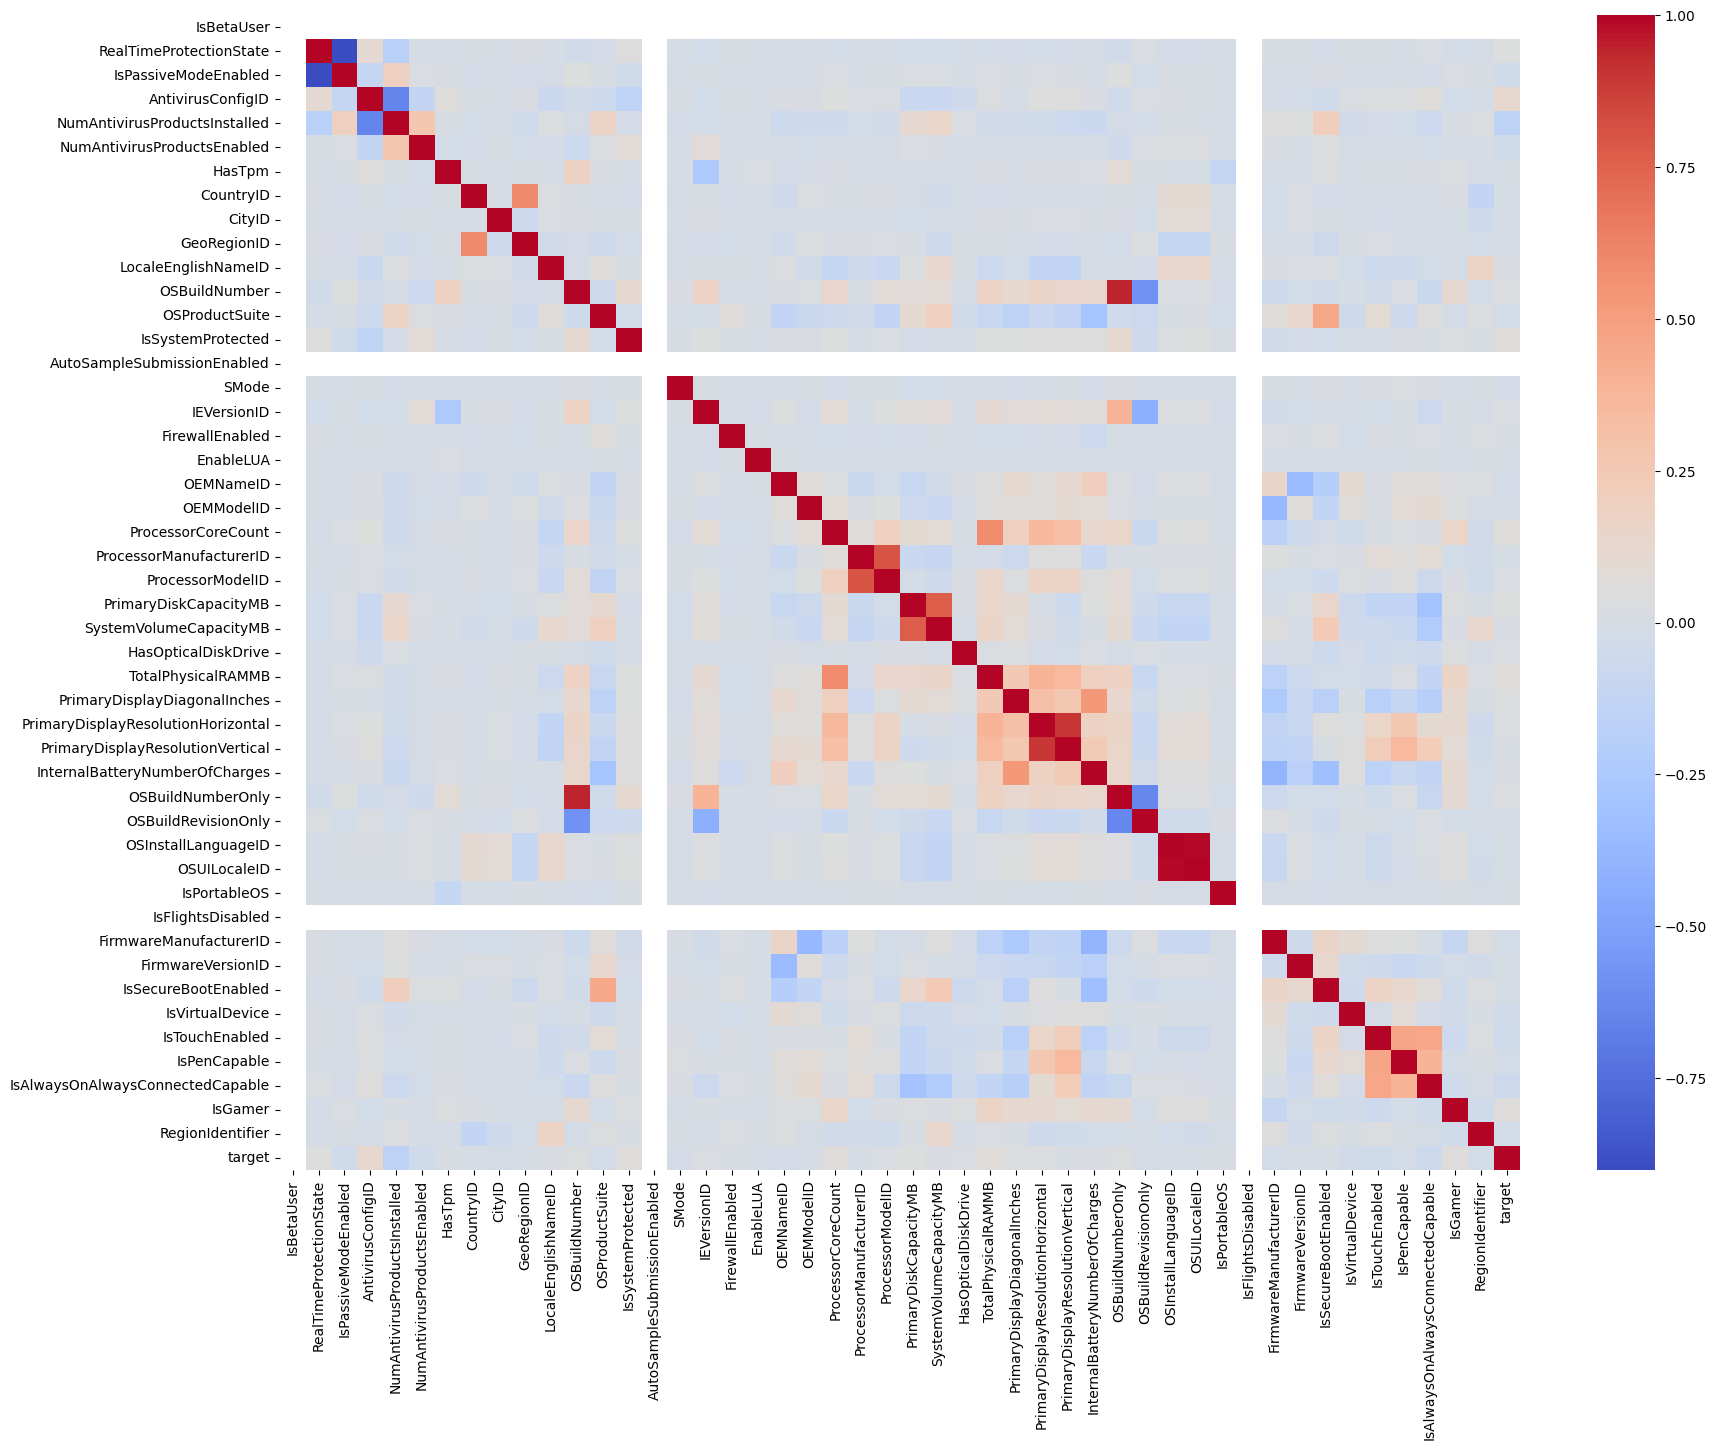

In [10]:
#overview of feature correlations
plt.figure(figsize=(20, 15))  # Increase figure size
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=False, cmap='coolwarm')
plt.show()

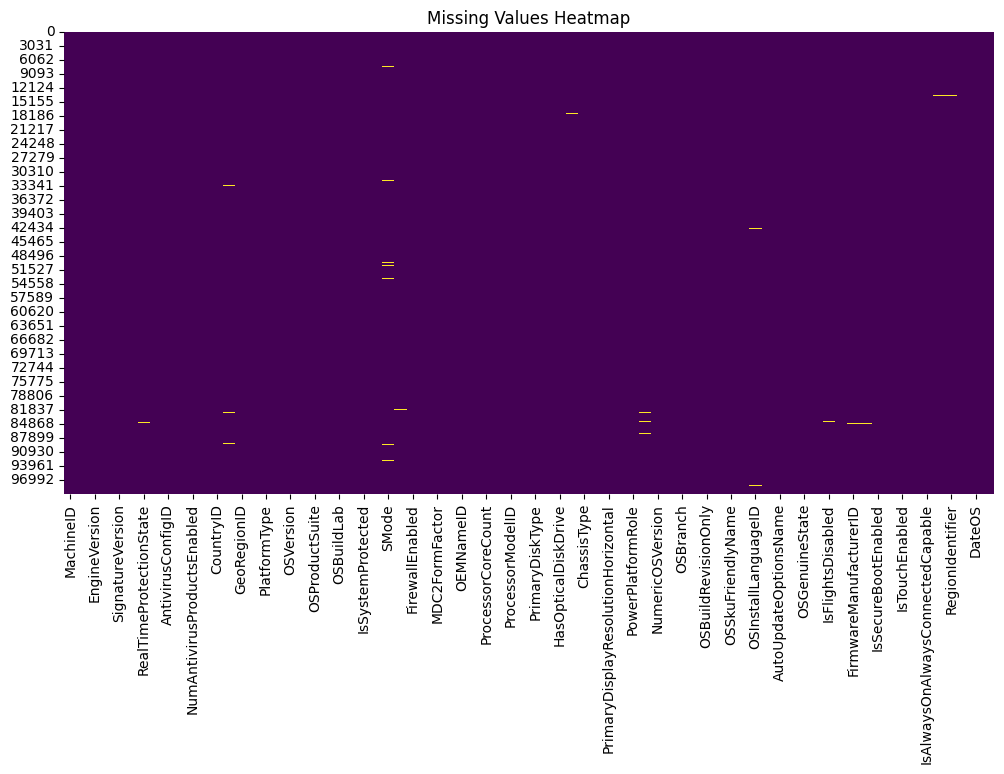

In [11]:
#visualize missing values in the dataset
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

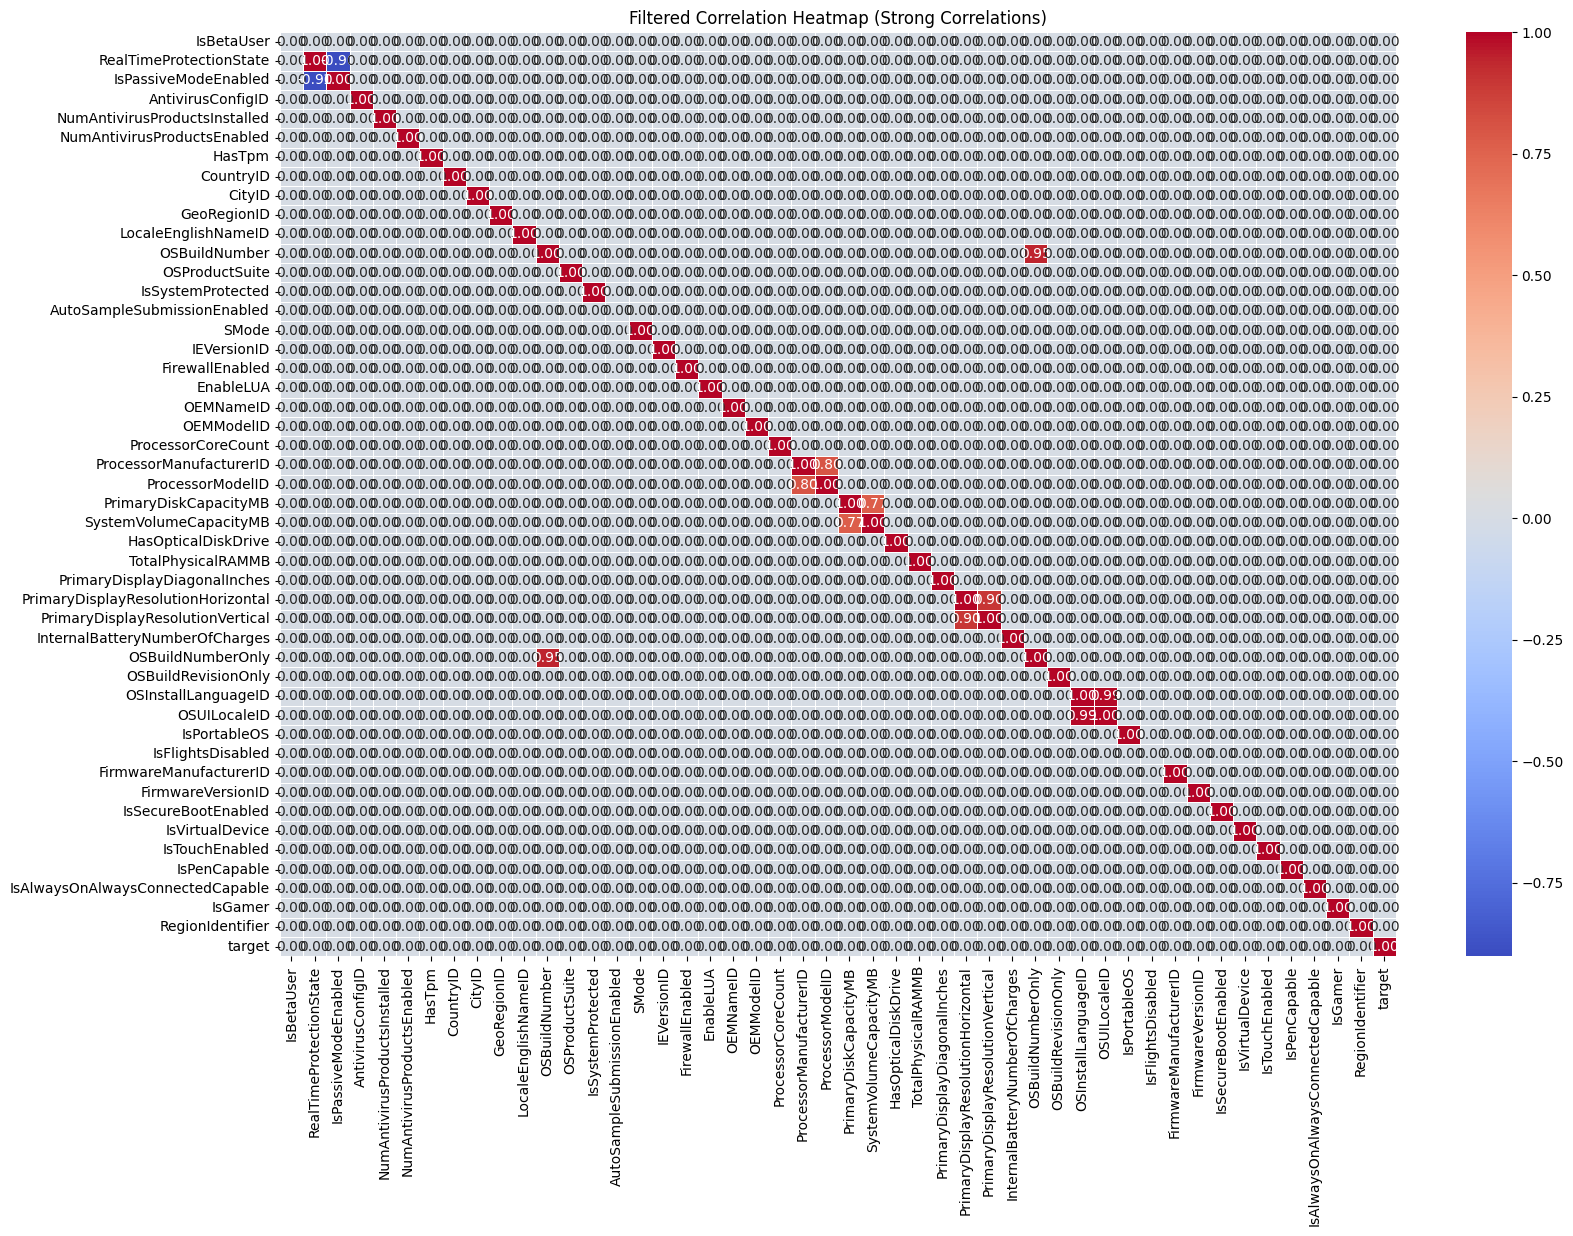

In [12]:
# strong correlation
#Keeps only correlations above 0.7 or below -0.7 for better focus

corr_matrix = df.select_dtypes(include=['number']).corr()

# Replace NaN and infinite values with 0
corr_matrix = corr_matrix.replace([np.inf, -np.inf], np.nan).fillna(0)

# Keep only strong correlations
filtered_corr = corr_matrix[(corr_matrix > 0.7) | (corr_matrix < -0.7)]

# Ensure no NaN or infinite values before plotting
filtered_corr = filtered_corr.fillna(0)

plt.figure(figsize=(18, 12))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Filtered Correlation Heatmap (Strong Correlations)")
plt.show()

In [13]:
# As the corr matrix is cluttered due to large dataset it is difficult to interpret

# Compute correlation matrix
corr_matrix = df.select_dtypes(include=['number']).corr()

# Replace NaN and infinite values with 0
corr_matrix = corr_matrix.replace([np.inf, -np.inf], np.nan).fillna(0)

# Extract only strong correlations (above 0.7 or below -0.7) excluding self-correlations
strong_corr = corr_matrix.unstack().reset_index()
strong_corr.columns = ["Feature1", "Feature2", "Correlation"]

# Remove self-correlations (diagonal 1.0 values)
strong_corr = strong_corr[strong_corr["Feature1"] != strong_corr["Feature2"]]

# Keep absolute correlations above 0.7
strong_corr = strong_corr[abs(strong_corr["Correlation"]) > 0.7]

# Sort by correlation strength
strong_corr = strong_corr.sort_values(by="Correlation", ascending=False)

# Display top correlated pairs
print("Top Correlated Features:")
print(strong_corr.head(20))


Top Correlated Features:
                                Feature1                            Feature2  \
1667                 OSInstallLanguageID                        OSUILocaleID   
1714                        OSUILocaleID                 OSInstallLanguageID   
560                        OSBuildNumber                   OSBuildNumberOnly   
1547                   OSBuildNumberOnly                       OSBuildNumber   
1422  PrimaryDisplayResolutionHorizontal    PrimaryDisplayResolutionVertical   
1469    PrimaryDisplayResolutionVertical  PrimaryDisplayResolutionHorizontal   
1079             ProcessorManufacturerID                    ProcessorModelID   
1126                    ProcessorModelID             ProcessorManufacturerID   
1177               PrimaryDiskCapacityMB              SystemVolumeCapacityMB   
1224              SystemVolumeCapacityMB               PrimaryDiskCapacityMB   
50               RealTimeProtectionState                IsPassiveModeEnabled   
97             

### **Analysis**  
After analyzing the correlation matrix, I found some feature pairs that are highly correlated (above 0.7). This means they might be redundant, and we should consider dropping one of them to avoid unnecessary complexity in our model.  

| **Feature 1**                          | **Feature 2**                          | **Correlation** | **What This Means** |
|----------------------------------------|----------------------------------------|----------------|--------------------|
| `OSInstallLanguageID`                 | `OSUILocaleID`                         | **0.988**      | These two seem to represent similar information about OS language settings, so keeping both may not add much value. |
| `OSBuildNumber`                        | `OSBuildNumberOnly`                    | **0.948**      | Looks like `OSBuildNumberOnly` is just another way of storing `OSBuildNumber`. One of them can be removed. |
| `PrimaryDisplayResolutionHorizontal`   | `PrimaryDisplayResolutionVertical`     | **0.898**      | These store screen resolution width and height separately. Instead, we could combine them into a single "Screen Area" feature (width × height). |
| `ProcessorManufacturerID`              | `ProcessorModelID`                     | **0.802**      | Since the processor model usually includes the manufacturer info, we might not need both. |
| `PrimaryDiskCapacityMB`                | `SystemVolumeCapacityMB`               | **0.771**      | The system volume is part of the primary disk, making these features closely related. We could keep only one. |
| `RealTimeProtectionState`              | `IsPassiveModeEnabled`                 | **-0.901**     | These two are strongly negatively correlated, meaning when one is active, the other is off. Keeping both may not be necessary. |


### **Actions to be performed:**  
- **Drop redundant features** to improve model efficiency.
- **Transform features** when needed. 
- **Double-check** that removing a feature doesn’t lead to loss of important information. 

# Descriptive Statistics

In [14]:
#desriptive statistical analysis of data
df.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,...,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,...,99624.000000,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000,100000.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,...,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866,0.505250
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,...,221.318891,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533,0.499975
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,...,142.000000,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,...,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,...,556.000000,52357.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000
max,0.0,8.000000,1.000000,70490.000000,5.000000,4.000000,1.000000,222.000000,167957.000000,296.000000,...,1083.000000,72091.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


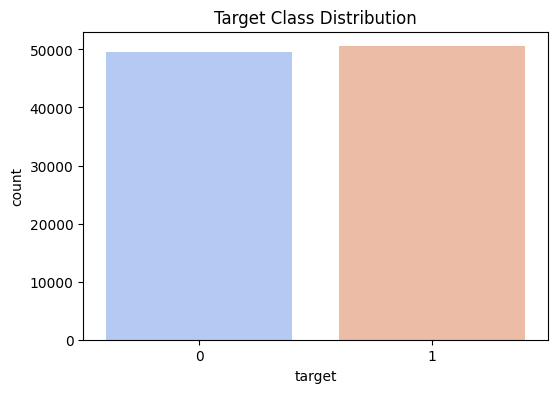

MachineID: 99835 unique values
ProductName: 2 unique values
EngineVersion: 37 unique values
AppVersion: 69 unique values
SignatureVersion: 2735 unique values
PlatformType: 4 unique values
Processor: 3 unique values
OSVersion: 7 unique values
OsPlatformSubRelease: 9 unique values
OSBuildLab: 281 unique values
SKUEditionName: 8 unique values
MDC2FormFactor: 11 unique values
DeviceFamily: 2 unique values
PrimaryDiskType: 4 unique values
ChassisType: 28 unique values
PowerPlatformRole: 9 unique values
NumericOSVersion: 221 unique values
OSArchitecture: 3 unique values
OSBranch: 13 unique values
OSEdition: 20 unique values
OSSkuFriendlyName: 18 unique values
OSInstallType: 9 unique values
AutoUpdateOptionsName: 6 unique values
OSGenuineState: 4 unique values
LicenseActivationChannel: 6 unique values
FlightRing: 7 unique values
DateAS: 2695 unique values
DateOS: 112 unique values


In [15]:
# Check the target distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['target'], palette="coolwarm")
plt.title("Target Class Distribution")
plt.show()

# Check unique values per categorical column
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

# Data Visulization

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


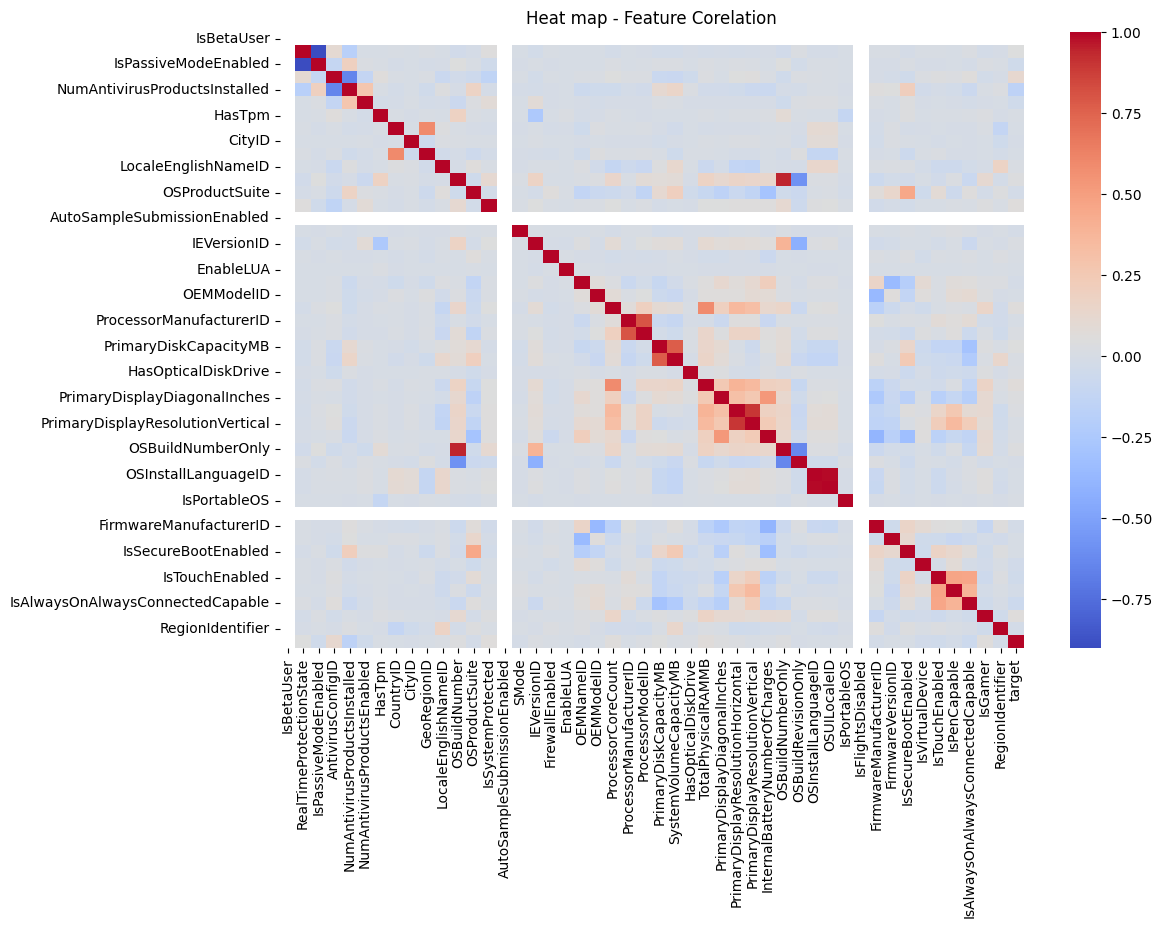

In [16]:
# Correlation heatmap (only for numeric features)
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap='coolwarm',annot=False) # Select only numeric features for correlation calculation
plt.title("Heat map - Feature Corelation")
plt.show()

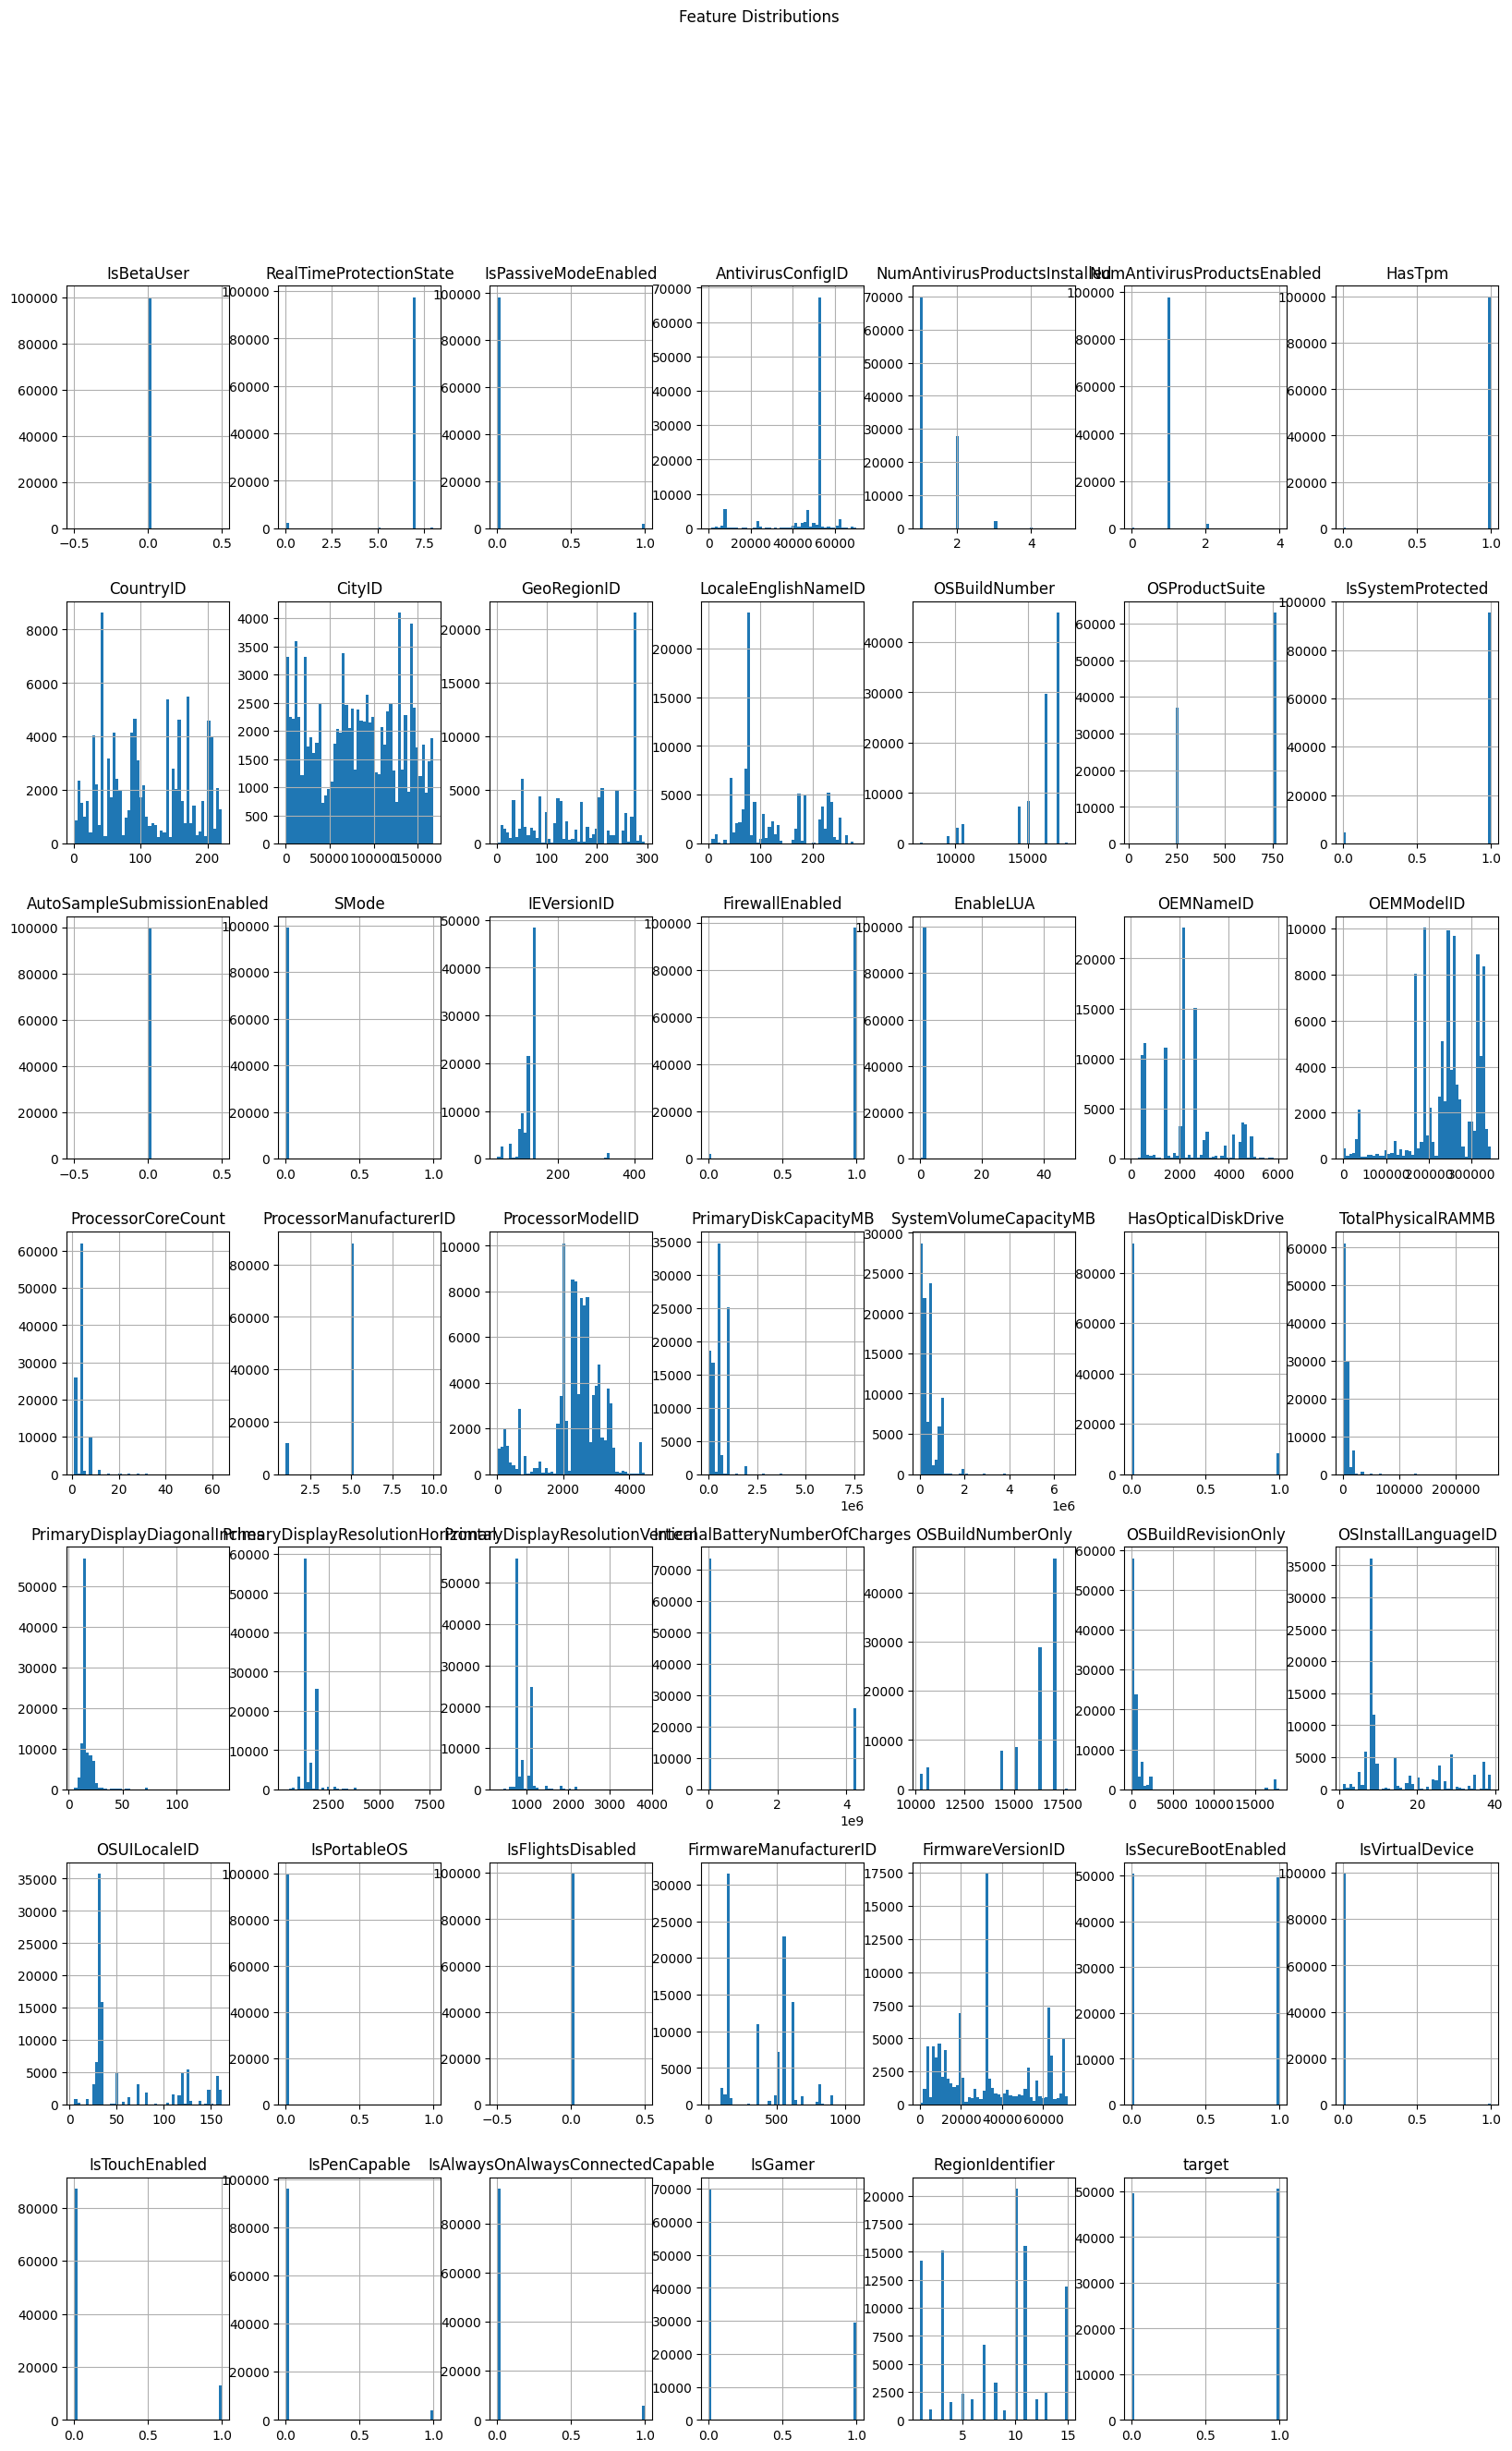

In [17]:
# Boxplot for numerical feature distributions
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist(figsize=(20, 30), bins=50)
plt.suptitle("Feature Distributions")
plt.show()

# Train-Validation Split

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['MachineID', 'target'])
y = df['target']

# Splitting the data (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Checking the split
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}")

Training set: (80000, 74), Validation set: (20000, 74)


# Data Cleaning/Preprocessing

In [19]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

# Identify the numerical and categorical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

In [20]:
# Handling the missing values
num_imputer = SimpleImputer(strategy="median")
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_val[num_cols] = num_imputer.transform(X_val[num_cols])
test_df[num_cols] = num_imputer.transform(test_df[num_cols])  # Apply same transformation to test set

cat_imputer = SimpleImputer(strategy="most_frequent")
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_val[cat_cols] = cat_imputer.transform(X_val[cat_cols])
test_df[cat_cols] = cat_imputer.transform(test_df[cat_cols])

In [21]:
# Encoding categorical features
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
X_train[cat_cols] = encoder.fit_transform(X_train[cat_cols])
X_val[cat_cols] = encoder.transform(X_val[cat_cols])
test_df[cat_cols] = encoder.transform(test_df[cat_cols])

In [22]:
# Converting date columns to numerical format (Unix timestamp)
for col in ["DateAS", "DateOS"]:
    X_train[col] = pd.to_datetime(X_train[col]).astype(int) // 10**9
    X_val[col] = pd.to_datetime(X_val[col]).astype(int) // 10**9
    test_df[col] = pd.to_datetime(test_df[col]).astype(int) // 10**9

In [23]:
# Scale numerical features (KNN, SVM, SGD, and MLP)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val_scaled[num_cols] = scaler.transform(X_val[num_cols])

# Model Training

## 1. Logistic Regression 

In [24]:
# Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Predict and evaluate
y_val_pred_lr = lr.predict(X_val_scaled)
print("Logistic Regression Validation Accuracy:", accuracy_score(y_val, y_val_pred_lr))
print(classification_report(y_val, y_val_pred_lr))

Logistic Regression Validation Accuracy: 0.5988
              precision    recall  f1-score   support

           0       0.61      0.51      0.56      9895
           1       0.59      0.68      0.63     10105

    accuracy                           0.60     20000
   macro avg       0.60      0.60      0.60     20000
weighted avg       0.60      0.60      0.60     20000



## 2. Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initializing the model with a fixed random state for reproducibility
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model using the training dataset
rf.fit(X_train, y_train)

# Generating predictions on the validation set
prediction_val = rf.predict(X_val)

# Evaluating performance using accuracy
accuracy = accuracy_score(y_val, prediction_val)
print(f"Accuracy: {accuracy:.5f}")
print("Classification Report:\n", classification_report(y_val, prediction_val))

Accuracy: 0.61515
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.60      0.61      9895
           1       0.62      0.63      0.62     10105

    accuracy                           0.62     20000
   macro avg       0.62      0.61      0.61     20000
weighted avg       0.62      0.62      0.62     20000



### Hyperparameter tuning

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

#Random Forest Hyperparameter Tuning
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf, rf_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)

best_rf = rf_grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_val)
rf_accuracy = accuracy_score(y_val, y_pred_rf)
print("Best Random Forest Accuracy:", rf_accuracy)

#SGD Classifier Hyperparameter Tuning
sgd_params = {
    'loss': ['hinge', 'log_loss', 'modified_huber'],
    'alpha': np.logspace(-4, 0, 5),
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.001, 0.01, 0.1]
}

sgd = SGDClassifier(random_state=42)
sgd_random_search = RandomizedSearchCV(sgd, sgd_params, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)
sgd_random_search.fit(X_train, y_train)

best_sgd = sgd_random_search.best_estimator_
y_pred_sgd = best_sgd.predict(X_val)
sgd_accuracy = accuracy_score(y_val, y_pred_sgd)
print("Best SGD Accuracy:", sgd_accuracy)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Random Forest Accuracy: 0.62
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best SGD Accuracy: 0.507


## 3. SVM

In [27]:
svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_val_scaled)
print("SVM Accuracy:", accuracy_score(y_val, y_pred_svm))

SVM Accuracy: 0.53225


## 4. KNN

In [28]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_val_scaled)
print("KNN Accuracy:", accuracy_score(y_val, y_pred_knn))

KNN Accuracy: 0.54145


## 5. Gradient Boosting

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_val)
print("Gradient Boosting Accuracy:", accuracy_score(y_val, y_pred_gb))

Gradient Boosting Accuracy: 0.6216


In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Initialize the model
gb = GradientBoostingClassifier(random_state=42)

# Perform Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(gb, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model and accuracy
best_gb = grid_search.best_estimator_
y_pred_best_gb = best_gb.predict(X_val)
best_gb_accuracy = accuracy_score(y_val, y_pred_best_gb)

print("Best Gradient Boosting Accuracy:", best_gb_accuracy)
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Gradient Boosting Accuracy: 0.625
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [31]:
# Drop 'MachineID' if it's not a feature used during training
test_df = test_df.drop(columns=['MachineID'], errors='ignore')

# Predict on test data
y_pred = best_gb.predict(test_df)

# Save predictions to CSV
submission = pd.DataFrame({
    "id": range(0, test_df.shape[0]),  # Generate row IDs
    "target": y_pred
})
submission.to_csv('submission.csv', index=False)

print("Submission file saved successfully!")

Submission file saved successfully!
